### Questions
- Do climate change milestones, such as rising temperatures and increased carbon emissions, influence the frequency of disasters?
- Does disaster readiness have any effect on the number of people displaced during a natural disaster?
- Do certain types of disasters lead to greater economic losses and higher numbers of refugees than others?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import regex as re
import us, squarify
from datetime import datetime
pd.reset_option('display.max_colwidth',None)

In [2]:
# Check for null values in global data set
data = pd.read_csv('public_emdat_Global_techNnatural.csv')
print(data.shape)

# Rename countries to reduce text length for graphs
replacement_map = {'United States of America': 'USA', 'Democratic Republic of the Congo': 'Congo', 'Russian Federation': 'Russia', 'United Republic of Tanzania': 'Tanzania'}
data['Country'] = data['Country'].replace(replacement_map)

null_summary = pd.DataFrame({
    'Null Count': data.isnull().sum(),
    '% Null': ((data.isnull().sum() / len(data)) * 100).map('{:.2f}'.format)
})

null_summary['% Null'] = null_summary['% Null'].astype(float)
null_summary.sort_values('% Null', ascending=False).rename_axis('Column Name')


(15999, 46)


,Null Count,% Null
Column Name,,
"Reconstruction Costs, Adjusted ('000 US$)",15966,99.79
Reconstruction Costs ('000 US$),15966,99.79
AID Contribution ('000 US$),15509,96.94
"Insured Damage, Adjusted ('000 US$)",15305,95.66
Insured Damage ('000 US$),15292,95.58
River Basin,14775,92.35
No. Homeless,14672,91.71
Longitude,14181,88.64
Latitude,14181,88.64


In [3]:
# Check for null values in U.S data set
usa_data = data[data.Country == 'USA'].reset_index(drop=True)
print(usa_data.shape)

us_null_summary = pd.DataFrame({
    'Null Count': usa_data.isnull().sum(),
    '% Null': ((usa_data.isnull().sum() / len(usa_data)) * 100).map('{:.2f}'.format)
})

us_null_summary['% Null'] = us_null_summary['% Null'].astype(float)
us_null_summary.sort_values('% Null', ascending=False).rename_axis('Column Name')

(709, 46)


,Null Count,% Null
Column Name,,
"Reconstruction Costs, Adjusted ('000 US$)",709,100.00
AID Contribution ('000 US$),709,100.00
Reconstruction Costs ('000 US$),709,100.00
External IDs,679,95.77
River Basin,661,93.23
Longitude,648,91.40
Latitude,648,91.40
No. Homeless,611,86.18
Origin,569,80.25


In [4]:
# Data Cleansing

data.drop(columns=["Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "AID Contribution ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", 'River Basin', 'No. Homeless', 'Start Day',
       'End Day', 'Latitude', 'Longitude', 'External IDs',
       "Total Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)",
       'Magnitude', "Associated Types", "Origin", "Event Name","Historic","Classification Key","ISO","No. Injured","No. Affected","Admin Units"], inplace=True)

data.shape

(15999, 22)

In [5]:
# Use Location column to understand which states are affected by each disaster and clean the column accordingly
# Correction key for data
us_state_names = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah",
    "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
us_states_abbr = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", 
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", 
    "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", 
    "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", 
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", 
    "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", 
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", 
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", 
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", 
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", 
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", 
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", 
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", 
    "Wisconsin": "WI", "Wyoming": "WY"
}
us_state_correction = {
    "au large de la californie": "California",
    "Pacifique":"California",
    "au large de la Californie":"California",
    "nouveau mexique": "New Mexico",
    "chicago": "Illinois",
    "los angeles": "California",
    "swisher districts": "Texas",
    "rhode isl. ": "Rhode Island",
    "near los angeles": "California",
    "atlantic terminal station": "New York",
    "north california": "California", # Changed from "None"
    "los angeles": "California",
    "jerauld": "South Dakota",
    "jefferson davis": "Mississippi",
    "nassau-florida": "Florida",
    "wilkes": "North Carolina",
    "noble in richland": "Illinois",
    "marion-in": "Indiana",
    "central michigan ": "Michigan",
    "south california": "California",
    "south-western louisiana": "Louisiana",
    "north california ": "California",
    "northern washington ": "Washington",
    "central-northern usa": "None",
    "montana and idaho s": "None",
    "hollywood": "California",
    "eastern washington ": "Washington",
    "eastern new mexico": "New Mexico",
    "district of columbia":"Washington, D.C.",
    "Nouveau Mexique" :"New Mexico"
}

# Supporting Function to Clean Location column 
def extract_state(x):
    if "(" in x:
        #x = x.replace(";",",")
        return re.findall(r'\((.*?)\)', x)
    if "," in x:
        #print("data with ,",x.split(","))
        return x.split(",")
    return [x]

# This line is if the location contains valid state. no need to continue further.
def segregate_state(x):
    x = re.sub(r'\s+s$', '', x) # Remove location with ' s' added to the valid state
    x = x.strip() # Remove extra spaces 
    x = re.sub(r'\s+and\s+', ',', x) # replace states that has 'and' with ','
    x = re.sub(r' near ', '', x) # remove state with near keyword
    x = re.sub(r'^.*?,\s*', '', x) # Regex to remove everything to the left of the comma
    
    if x in us_state_correction.keys():
        x = us_state_correction[x] # Check if the state is valid
    x_state = us.states.lookup(x).__str__()
    if not x_state == 'None':
        return x_state.capitalize().strip()
    else:
        # Find words that contain the substring
        x_state = [st for st in us_states_abbr.keys() if  st.lower() in x]
        if len(x_state) > 0:
            return x_state
        else:
            return x # if not valid return as-is

data_usa = data[data.Country == 'USA'].reset_index(drop=True)
print(data_usa.shape)
locations=list(data_usa['Location'])

# Fix the following :
# We have some states in brackets '()'
# the state name is attached with text 'province' 
# The state name is attached with text 'state'
# Some location column has more than one state combined in one row. We will duplicate those rows and add rows for each state in seperate rows
# We will also fix letter cases.The capitalize() method returns a string where the first character is upper case, and the rest is lower case.

data_usa['Location'] = data_usa['Location'].fillna("")
pattern = '|'.join(['province', 'provinces','state','State','nan'])
# Extract text inside parent heses and split by ';'
data_usa['Location'] = data_usa['Location'].str.replace(pattern, '', regex=True)
data_usa['Location'] = data_usa['Location'].str.replace(',\s+', ',', regex=True)
data_usa['U.S State'] = data_usa['Location'].apply(extract_state)
data_usa_exploded = data_usa.explode('U.S State').reset_index(drop=True)
data_usa_exploded['U.S State'] = data_usa_exploded['U.S State'].apply(segregate_state)

# Cleaning the rows with Location as Nan 
# REferences :https://stackoverflow.com/questions/73285289/remove-rows-in-dataframe-only-if-a-certain-condition-is-met-using-pandas
data_usa_exploded['U.S State'].dropna(axis=0,inplace=True) # aqbove one is more efficient 
data_usa_exploded.reset_index(drop=True)
data_usa_exploded["U.S State"] = data_usa_exploded["U.S State"].str.capitalize()
data_usa_natural_explode = data_usa_exploded[data_usa_exploded['Disaster Group'] == 'Natural']
data_usa_natural_explode['U.S State']

# Remove the Location not in Valid US State 
data_usa_natural_explode.reset_index(drop=True,inplace=True)
data_usa_natural_explode_us_state = data_usa_natural_explode[data_usa_natural_explode['U.S State'].isin(us_state_names)]
data_usa = data_usa_natural_explode_us_state

print(data_usa.shape)


(709, 22)
(2413, 23)


<>:110: SyntaxWarning: invalid escape sequence '\s'
<>:110: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5z/vwlhdkfs5z962nx5wd1n23j40000gn/T/ipykernel_69029/699083485.py:110: SyntaxWarning: invalid escape sequence '\s'
  data_usa['Location'] = data_usa['Location'].str.replace(',\s+', ',', regex=True)


In [22]:
# Colors Palette

graph = '#FDB515'
background = '#002676'
text = '#cbd8fe'


       Country  Disaster Count
0        China            1349
1        India             808
2          USA             709
3    Indonesia             561
4  Philippines             465
5      Nigeria             437
6        Congo             345
7     Pakistan             320
8       Russia             306
9   Bangladesh             276


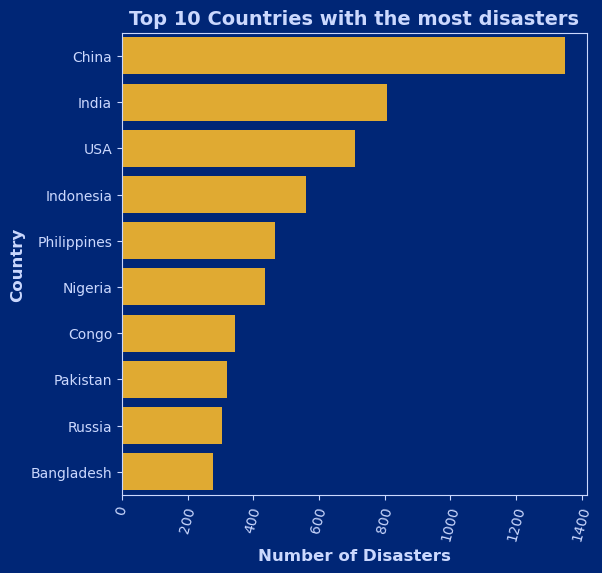

In [19]:
# 1a. Total Disasters - Country
# Aggregate disaster counts by country
top_countries = data['Country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Disaster Count']

print(top_countries)

# Graph
plt.figure(figsize=(6,6))
sns.barplot(data=top_countries,x='Disaster Count',y='Country',color='#FDB515')
plt.xlabel('Number of Disasters',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.xticks(fontsize=10,color='#cbd8fe')
plt.ylabel('Country',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.yticks(fontsize=10,color='#cbd8fe')
plt.title('Top 10 Countries with the most disasters',fontsize=14,fontweight='bold',color='#cbd8fe')
plt.xticks(rotation=75)

# Add background colors
plt.gca().set_facecolor('#002676')
plt.gcf().set_facecolor('#002676') 

plt.gca().spines['top'].set_color('#cbd8fe')    # Top border
plt.gca().spines['bottom'].set_color('#cbd8fe')  # Bottom border
plt.gca().spines['left'].set_color('#cbd8fe')   # Left border
plt.gca().spines['right'].set_color('#cbd8fe') # Right border

# Customize tick bars
plt.tick_params(axis='x', colors='#cbd8fe')  # Change color of x-axis tick bars
plt.tick_params(axis='y', colors='#cbd8fe') # Change color of y-axis tick bars


     U.S State  Disaster Count
0        Texas             173
1     Oklahoma             116
2     Missouri             115
3     Illinois              98
4  Mississippi              94
5       Kansas              92
6   California              88
7    Tennessee              84
8    Louisiana              83
9      Alabama              82


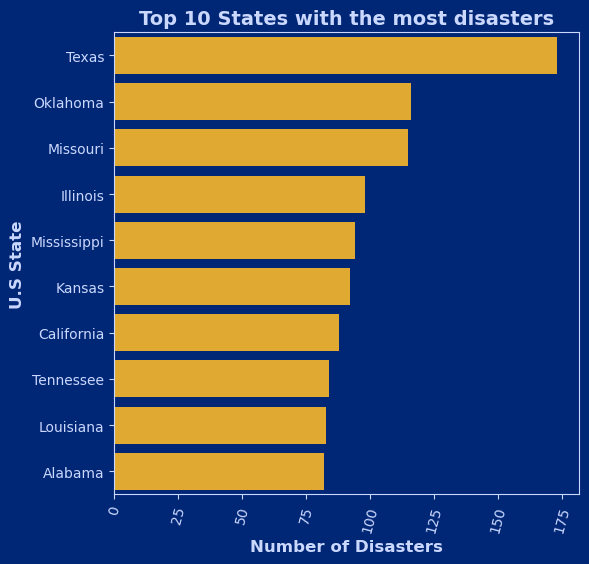

In [20]:
# 1a. Total Disasters - U.S State
# Aggregate disaster counts by country
top_states = data_usa['U.S State'].value_counts().head(10).reset_index()
top_states.columns = ['U.S State', 'Disaster Count']

print(top_states)

# Graph
plt.figure(figsize=(6,6))
sns.barplot(data=top_states,x='Disaster Count',y='U.S State',color='#FDB515')
plt.xlabel('Number of Disasters',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.xticks(fontsize=10,color='#cbd8fe')
plt.ylabel('U.S State',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.yticks(fontsize=10,color='#cbd8fe')
plt.title('Top 10 States with the most disasters',fontsize=14,fontweight='bold',color='#cbd8fe')
plt.xticks(rotation=75)

# Add background colors
plt.gca().set_facecolor('#002676')
plt.gcf().set_facecolor('#002676') 

plt.gca().spines['top'].set_color('#cbd8fe')    # Top border
plt.gca().spines['bottom'].set_color('#cbd8fe')  # Bottom border
plt.gca().spines['left'].set_color('#cbd8fe')   # Left border
plt.gca().spines['right'].set_color('#cbd8fe') # Right border

# Customize tick bars
plt.tick_params(axis='x', colors='#cbd8fe')  # Change color of x-axis tick bars
plt.tick_params(axis='y', colors='#cbd8fe') # Change color of y-axis tick bars



             Disaster Duration
Country                       
China                   1500.0
India                    993.0
USA                      953.0
Indonesia                634.0
Congo                    588.0
Philippines              577.0
Nigeria                  566.0
Pakistan                 411.0
Brazil                   404.0
Kenya                    343.0


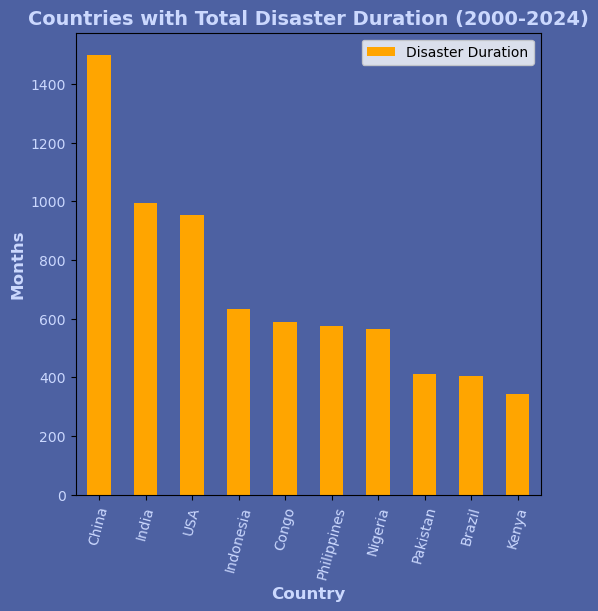

In [ ]:
# 1b. Duration of Disaster - Global

# Remove records which do not have either a Start Month or End month (total 203 rows)

# print(data.shape) # (15999, 24)

o1b_data = data[~(data['Start Month'].isnull() | data['End Month'].isnull())].reset_index()

# print(j_data.shape) # (15796, 24)

# Create new columns with Start and End dates using day 1 of month as start and last day for end
o1b_data['Start Month'] = o1b_data['Start Month'].astype(int)
o1b_data['End Month'] = o1b_data['End Month'].astype(int)
o1b_data['Start Year'] = o1b_data['Start Year'].astype(str)
o1b_data['End Year'] = o1b_data['End Year'].astype(str)

o1b_data['Start Time'] = o1b_data['Start Year'] + '-' + o1b_data['Start Month'].astype(str)
o1b_data['End Time'] = o1b_data['End Year'] + '-' + o1b_data['End Month'].astype(str)

o1b_data['Start Time'] = pd.to_datetime(o1b_data['Start Time'], format='%Y-%m')
o1b_data['Start Time'] = o1b_data['Start Time'] + pd.offsets.Day(0)

o1b_data['End Time'] = pd.to_datetime(o1b_data['End Time'], format='%Y-%m')
o1b_data['End Time'] = o1b_data['End Time'] + pd.offsets.MonthEnd(0)

# Calculate the duration as difference between start and end dates
o1b_data['Disaster Duration'] = round(((o1b_data['End Time'] - o1b_data['Start Time']).dt.days) / 30) # Months

# Group the data by Country and sum of duration sorted descending and pull top 10 countries
group_data = o1b_data.groupby('Country')['Disaster Duration'].sum().sort_values(ascending=False)
country_df = group_data.reset_index().set_index('Country').head(10)

print(country_df)

country_df.plot.bar(color='orange',figsize=(6,6))
plt.xlabel('Country',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.xticks(fontsize=10,color='#cbd8fe')
plt.ylabel('Months',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.yticks(fontsize=10,color='#cbd8fe')
plt.title('Countries with Total Disaster Duration (2000-2024)',fontsize=14,fontweight='bold',color='#cbd8fe')
plt.xticks(rotation=75)

# Add background colors
plt.gca().set_facecolor('#4d61a2')
plt.gcf().set_facecolor('#4d61a2') 

pass


             Disaster Duration
U.S State                     
Texas                    256.0
California               179.0
Oklahoma                 174.0
Missouri                 160.0
Kansas                   142.0
Illinois                 142.0
Mississippi              115.0
Louisiana                114.0
Georgia                  112.0
Kentucky                 111.0


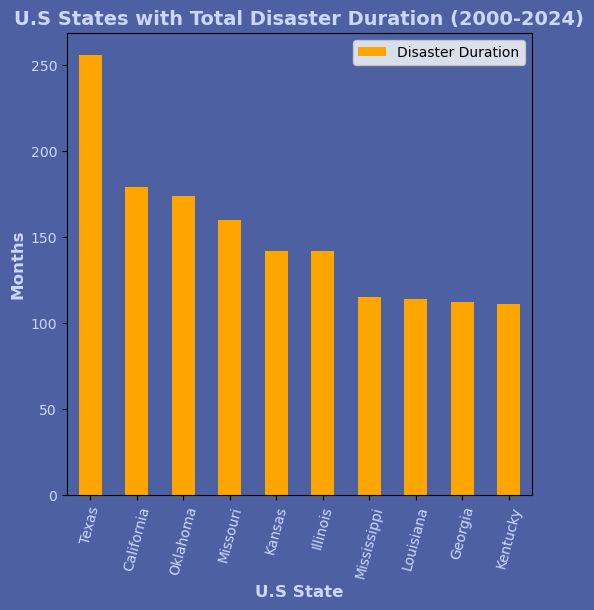

In [ ]:
# 1b. Duration of Disaster - United States

o1b_data_us = data_usa[~(data_usa['Start Month'].isnull() | data_usa['End Month'].isnull())].reset_index()

# Create new columns with Start and End dates using day 1 of month as start and last day for end
o1b_data_us['Start Month'] = o1b_data_us['Start Month'].astype(int)
o1b_data_us['End Month'] = o1b_data_us['End Month'].astype(int)
o1b_data_us['Start Year'] = o1b_data_us['Start Year'].astype(str)
o1b_data_us['End Year'] = o1b_data_us['End Year'].astype(str)

o1b_data_us['Start Time'] = o1b_data_us['Start Year'] + '-' + o1b_data_us['Start Month'].astype(str)
o1b_data_us['End Time'] = o1b_data_us['End Year'] + '-' + o1b_data_us['End Month'].astype(str)

o1b_data_us['Start Time'] = pd.to_datetime(o1b_data_us['Start Time'], format='%Y-%m')
o1b_data_us['Start Time'] = o1b_data_us['Start Time'] + pd.offsets.Day(0)

o1b_data_us['End Time'] = pd.to_datetime(o1b_data_us['End Time'], format='%Y-%m')
o1b_data_us['End Time'] = o1b_data_us['End Time'] + pd.offsets.MonthEnd(0)

# Calculate the duration as difference between start and end dates
o1b_data_us['Disaster Duration'] = round((o1b_data_us['End Time'] - o1b_data_us['Start Time']).dt.days / 30) # Months

# Group the data by Country and sum of duration sorted descending and pull top 10 countries
us_group_data = o1b_data_us.groupby('U.S State')['Disaster Duration'].sum().sort_values(ascending=False)
us_df = us_group_data.reset_index().set_index('U.S State').head(10)

print(us_df)

us_df.plot.bar(color='orange',figsize=(6,6))
plt.xlabel('U.S State',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.xticks(fontsize=10,color='#cbd8fe')
plt.ylabel('Months',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.yticks(fontsize=10,color='#cbd8fe')
plt.title('U.S States with Total Disaster Duration (2000-2024)',fontsize=14,fontweight='bold',color='#cbd8fe')
plt.xticks(rotation=75)

# Add background colors
plt.gca().set_facecolor('#4d61a2')
plt.gcf().set_facecolor('#4d61a2') 

pass

              Disaster Duration
Country                        
Uruguay                    62.0
Madagascar                 51.0
Zimbabwe                   50.0
Senegal                    46.0
Brazil                     36.0
Iraq                       32.0
Tanzania                   30.0
Mauritania                 30.0
Thailand                   29.0
South Africa               29.0


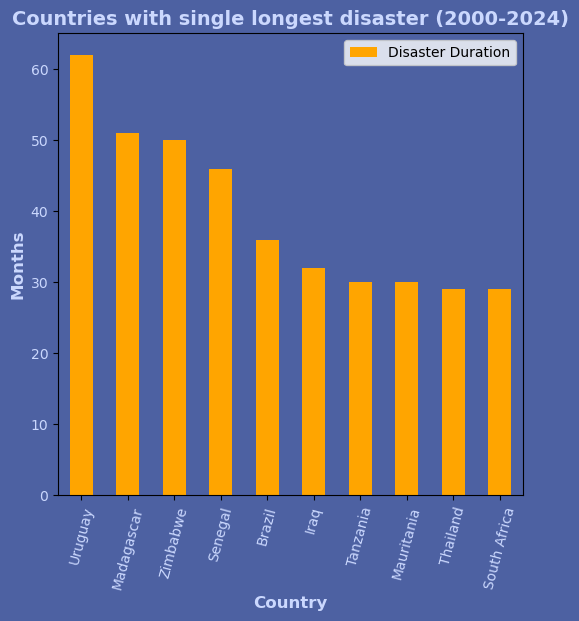

In [ ]:
# 1b. Place with longest disaster - Country

# Group the data by Country and sum of duration sorted descending and pull top 10 countries
group_data = o1b_data.groupby('Country')['Disaster Duration'].max().sort_values(ascending=False)
country_df_l = group_data.reset_index().set_index('Country').head(10)

print(country_df_l)

country_df_l.plot.bar(color='orange',figsize=(6,6))
plt.xlabel('Country',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.xticks(fontsize=10,color='#cbd8fe')
plt.ylabel('Months',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.yticks(fontsize=10,color='#cbd8fe')
plt.title('Countries with single longest disaster (2000-2024)',fontsize=14,fontweight='bold',color='#cbd8fe')
plt.xticks(rotation=75)

# Add background colors
plt.gca().set_facecolor('#4d61a2')
plt.gcf().set_facecolor('#4d61a2') 

            Disaster Duration
U.S State                    
Maryland                 21.0
California               21.0
Georgia                  21.0
Texas                    13.0
Illinois                 13.0
Nebraska                 13.0
Oklahoma                 13.0
Kentucky                 13.0
Missouri                 13.0
Kansas                   13.0


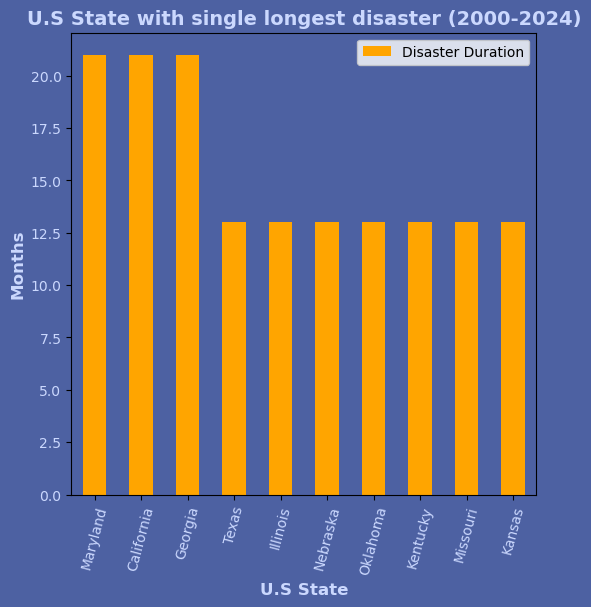

In [ ]:
# 1b. Place with longest disaster - U.S State

# Group the data by Country and sum of duration sorted descending and pull top 10 countries
group_data = o1b_data_us.groupby('U.S State')['Disaster Duration'].max().sort_values(ascending=False)
state_df_l = group_data.reset_index().set_index('U.S State').head(10)

print(state_df_l)

state_df_l.plot.bar(color='orange',figsize=(6,6))
plt.xlabel('U.S State',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.xticks(fontsize=10,color='#cbd8fe')
plt.ylabel('Months',fontsize=12,fontweight='bold',color='#cbd8fe')
plt.yticks(fontsize=10,color='#cbd8fe')
plt.title('U.S State with single longest disaster (2000-2024)',fontsize=14,fontweight='bold',color='#cbd8fe')
plt.xticks(rotation=75)

# Add background colors
plt.gca().set_facecolor('#4d61a2')
plt.gcf().set_facecolor('#4d61a2') 

/var/folders/5z/vwlhdkfs5z962nx5wd1n23j40000gn/T/ipykernel_67923/92214191.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Affected'].fillna(0, inplace=True)


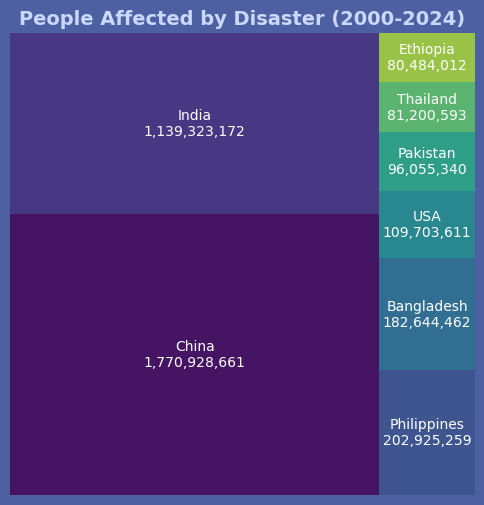

In [ ]:
# 1c. People Impacted - Global

# The column in focus will be "Total Affected"

# Fill null values as zero
data['Total Affected'].fillna(0, inplace=True)
# Type cast total affected as int
data['Total Affected'] = data['Total Affected'].astype(int)

# Group data and select the top 10 countries by deaths
group_data_aff = data.groupby('Country')['Total Affected'].sum().sort_values(ascending=False)
affected_df = group_data_aff.reset_index().set_index('Country').head(8)

# Prepare data for the treemap
sizes = affected_df['Total Affected'].values
labels = [f"{country}\n{count:,}" for country, count in zip(affected_df.index, sizes)]  # Add counts to labels
colors = cm.viridis([i / len(sizes) for i in range(len(sizes))])  # Generate a colormap

# Create the treemap
plt.figure(figsize=(6, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 10, 'color': 'white'})

# Formatting
plt.title('People Affected by Disaster (2000-2024)', fontsize=14, fontweight='bold', color='#cbd8fe')
plt.axis('off')  # Turn off the axis for a cleaner look

# Add background colors
plt.gca().set_facecolor('#4d61a2') 
plt.gcf().set_facecolor('#4d61a2') 

# Show plot
plt.show()

/var/folders/5z/vwlhdkfs5z962nx5wd1n23j40000gn/T/ipykernel_67923/3995823569.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Deaths'].fillna(0, inplace=True)


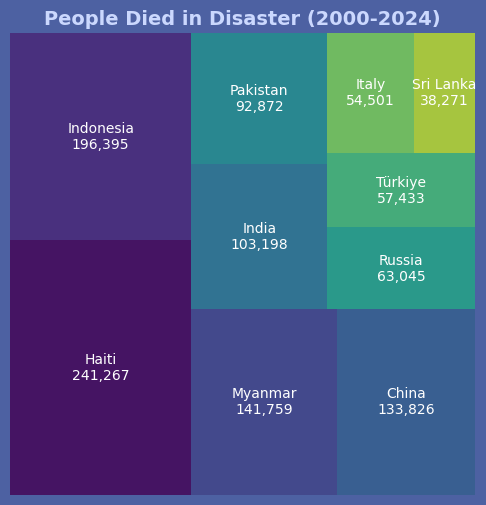

In [ ]:
# 1c. People Impacted - Global

# The column in focus will be "Total Deaths"

# Fill null values as zero
data['Total Deaths'].fillna(0, inplace=True)
# Type cast total affected as int
data['Total Deaths'] = data['Total Deaths'].astype(int)

# Group data and select the top 10 countries by deaths
group_data_deaths = data.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
deaths_df = group_data_deaths.reset_index().set_index('Country').head(10)

# Prepare data for the treemap
sizes = deaths_df['Total Deaths'].values
labels = [f"{country}\n{count:,}" for country, count in zip(deaths_df.index, sizes)]  # Add counts to labels
colors = cm.viridis([i / len(sizes) for i in range(len(sizes))])  # Generate a colormap

# Create the treemap
plt.figure(figsize=(6, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 10, 'color': 'white'})

# Formatting
plt.title('People Died in Disaster (2000-2024)', fontsize=14, fontweight='bold', color='#cbd8fe')
plt.axis('off')  # Turn off the axis for a cleaner look

# Add background colors
plt.gca().set_facecolor('#4d61a2') 
plt.gcf().set_facecolor('#4d61a2') 

# Show plot
plt.show()

In [ ]:
# 1d Damage Incurred
